<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/SeATAC_corrects_batch_effects_sf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SeATAC corrects the batch effect of fragment sizes in ATAC-seq data



In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [5] "  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [6] "  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "  libcupsfilters1 libcupsimage2 libdjvulibre-dev libdjvulibre-text"                                              

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr', 'AUC',
  'BSgenome.Hsapiens.UCSC.hg19',
  'EnrichedHeatmap', 'magick', 'patchwork'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'AUC', 'BSgenome.Hsapiens.UCSC.hg19',
  'EnrichedHeatmap', 'magick', 'patchwork'

also installing the dependencies ‘formatR’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘lambda.r’, ‘futile.options’, ‘SummarizedExperiment’, ‘futile.logger’, ‘snow’, ‘BH’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XML’, ‘zlibbioc’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘bitops’, ‘BiocParallel’, ‘Rhtslib’, ‘iterators’, ‘BiocGenerics’, ‘S4Vectors’, ‘GenomeInfoDb’, ‘Biostrings’, ‘rtracklayer’, ‘XVector’, ‘Rsamtools’, ‘clue’, ‘GlobalOptions’, ‘png’, ‘foreach’, ‘doParallel’, ‘rjson’, ‘shape’, ‘BSgenome’, ‘ComplexHeatmap’, ‘GenomicRanges’, ‘matrixStats’, ‘GetoptLong’, ‘locfit’, ‘circlize’, ‘IRanges’


Old packages: 'fansi', 'knitr', 'processx', 'sass'

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

fansi        (1.0.2 -> 1.0.3 ) [CRAN]
tfautograph  (NA    -> 0.3.2 ) [CRAN]
processx     (3.5.2 -> 3.5.3 ) [CRAN]
config       (NA    -> 0.3.1 ) [CRAN]
here         (NA    -> 1.0.1 ) [CRAN]
RcppTOML     (NA    -> 0.1.7 ) [CRAN]
zeallot      (NA    -> 0.1.0 ) [CRAN]
tfruns       (NA    -> 1.5.0 ) [CRAN]
tensorflow   (NA    -> 2.8.0 ) [CRAN]
reticulate   (NA    -> 1.24  ) [CRAN]
caTools      (NA    -> 1.18.2) [CRAN]
gtools       (NA    -> 3.9.2 ) [CRAN]
keras        (NA    -> 2.8.0 ) [CRAN]
abind        (NA    -> 1.4-5 ) [CRAN]
gplots       (NA    -> 3.1.1 ) [CRAN]
tfdatasets   (NA    -> 2.7.0 ) [CRAN]
tfprobabi... (NA    -> 0.15.0) [CRAN]


Installing 17 packages: fansi, tfautograph, processx, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, caTools, gtools, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpW6LWAU/remotes515b146092/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [ ]:
library(GenomicRanges)
library(BSgenome.Hsapiens.UCSC.hg19)
library(dplyr)
library(ggplot2)
library(EnrichedHeatmap)
library(circlize)
library(magick)
library(AUC)
library(broom)
library(patchwork)
library(Matrix)


Attaching package: ‘Matrix’


The following object is masked from ‘package:S4Vectors’:

    expand




### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 12.91038 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 1280,
  fragment_size_interval = 10L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,

  vae_num_peaks = 5000L,
  vae_num_peaks_test = 2000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(16L),
  vae_warmup_ratio = 0.1,

  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

## Load human blood ATAC-seq data

In [ ]:
remote_bam_files = c(
  'BM0106-UNK-ATAC-2' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356157.bam",
  'BM0106-Day0-MCP-A' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356156.bam",
  'BM1214-Day0-MCP' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356166.bam",
  'BM1214-Day0-UNK-A' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356167.bam",
  'BM1077-MCP' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356160.bam",
  'BM1137-GMP3-high-ATAC-2' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356165.bam",
  'BM1214-Day0-UNK-B' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356168.bam",
  'BM1137-GMP1-low-ATAC-2' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356162.bam",
  'BM0828-MEGA1-B-151109' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356159.bam",
  'BM1137-GMP2-mid-ATAC-2' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356164.bam",
  'BM1137-GMP2-mid-ATAC-1' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356163.bam",
  'BM1077-UNK' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356161.bam",
  'BM0828-MEGA1-A-151109' = "https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356158.bam"
)
local_bam_files <- gsub('https://', './', remote_bam_files)

In [ ]:
for (f in remote_bam_files){
  sprintf('wget -cx %s', f) %>% system()
}

In [ ]:
remote_bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/GSE96771.bed'
local_bed_file <- gsub('https://', './', remote_bed_file)
system(sprintf('wget -cx %s', remote_bed_file))

## Read V-plots

In [ ]:
gr0 <- read.table(local_bed_file, header = FALSE, sep = '\t')
gr0 <- GRanges(seqnames = gr0[, 1], range = IRanges(gr0[, 2], gr0[, 3]))
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr0 <- gr0 %>% resize(width = ARGS[['window_size']], fix = 'center')

In [ ]:
gr0 <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr0, ARGS[['vae_num_peaks']])

In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Hsapiens.UCSC.hg19, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356157.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356156.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356166.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356167.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356160.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356165.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356168.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356162.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356159.bam

read_bam | reading ./s3.msi.umn.edu/g

## Training VAE model for V-plots

As of 3/14/2022, Colab had errors on the first run. Run the cell again will resolve the issue.

In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss=13026.4763659 | loss_reconstruction=13025.2825947 | loss_kl=    1.1937570

epoch=     2/   200 | beta=1.000e+00 | loss=10776.2315545 | loss_reconstruction=10759.1903922 | loss_kl=   17.0411680

epoch=     3/   200 | beta=1.000e+00 | loss= 9481.8398781 | loss_reconstruction= 9468.1761338 | loss_kl=   13.6637838

epoch=     4/   200 | beta=1.000e+00 | loss= 7453.3098043 | loss_reconstruction= 7445.0418065 | loss_kl=    8.2679933

epoch=     5/   200 | beta=1.000e+00 | loss= 4915.2616556 | loss_reconstruction= 4910.9261494 | loss_kl=    4.3354891

epoch=     6/   200 | beta=1.000e+00 | loss= 2760.2215506 | loss_reconstruction= 2758.1498661 | loss_kl=    2.0716865

epoch=     7/   200 | beta=1.000e+00 | loss= 1456.3936393 | loss_reconstruction= 1455.5062509 | loss_kl=    0.8873864

epoch=     8/   200 | beta=1.000e+00 | loss=  792.7761324 | loss_reconstruction=  792.4464940 | loss_kl=    0.3296373

epoch=     9/   200 | beta=1.000e+00 | loss=  46

## Predict the V-plots

In [ ]:
set.seed(1L); gr <- sample(gr0, ARGS[['vae_num_peaks_test']])

In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Hsapiens.UCSC.hg19, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356157.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356156.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356166.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356167.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356160.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356165.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356168.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356162.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20201124a/SRR5356159.bam

read_bam | reading ./s3.msi.umn.edu/g

In [ ]:
x <- model %>% predict(x, batch = 8L, vplots = TRUE)

In [ ]:
z <- assays(x, withDimnames = FALSE)$counts
df_counts <- do.call('rbind', lapply(1:dim(x)['sample'], function(i){
		j <-  colData(x)$sample == i
		zi <- z[, j, drop = FALSE]
		w <- 1 / rowSums(zi)
		w[is.infinite(w)] <- 0
		zi <- Diagonal(x = w) %*% zi
		zi <- colSums(zi)
		zi <- zi / sum(zi)
		data.frame(
			value = zi, 
			bin = x@dimdata$bin$position[colData(x)$bin][j], 
			interval = x@dimdata$interval$center[colData(x)$interval][j], 
			sample = x@dimdata$sample$name[colData(x)$sample][j],
      group = 'counts'
		)
	}))	%>%
		mutate(sample = factor(sample, x@dimdata$sample$name))

In [ ]:
z <- assays(x, withDimnames = FALSE)$predicted_counts
df_predicted_counts <- do.call('rbind', lapply(1:dim(x)['sample'], function(i){
		j <-  colData(x)$sample == i
		zi <- z[, j, drop = FALSE]
		w <- 1 / rowSums(zi)
		w[is.infinite(w)] <- 0
		zi <- Diagonal(x = w) %*% zi
		zi <- colSums(zi)
		zi <- zi / sum(zi)
		data.frame(
			value = zi, 
			bin = x@dimdata$bin$position[colData(x)$bin][j], 
			interval = x@dimdata$interval$center[colData(x)$interval][j], 
			sample = x@dimdata$sample$name[colData(x)$sample][j],
      group = 'predicted_counts'
		)
	}))	%>%
		mutate(sample = factor(sample, x@dimdata$sample$name))

In [ ]:
df <- rbind(
  df_counts,
  df_predicted_counts
)

In [ ]:
table(df$group)


          counts predicted_counts 
          212992           212992 

`summarise()` has grouped output by 'sample', 'interval'. You can override
using the `.groups` argument.


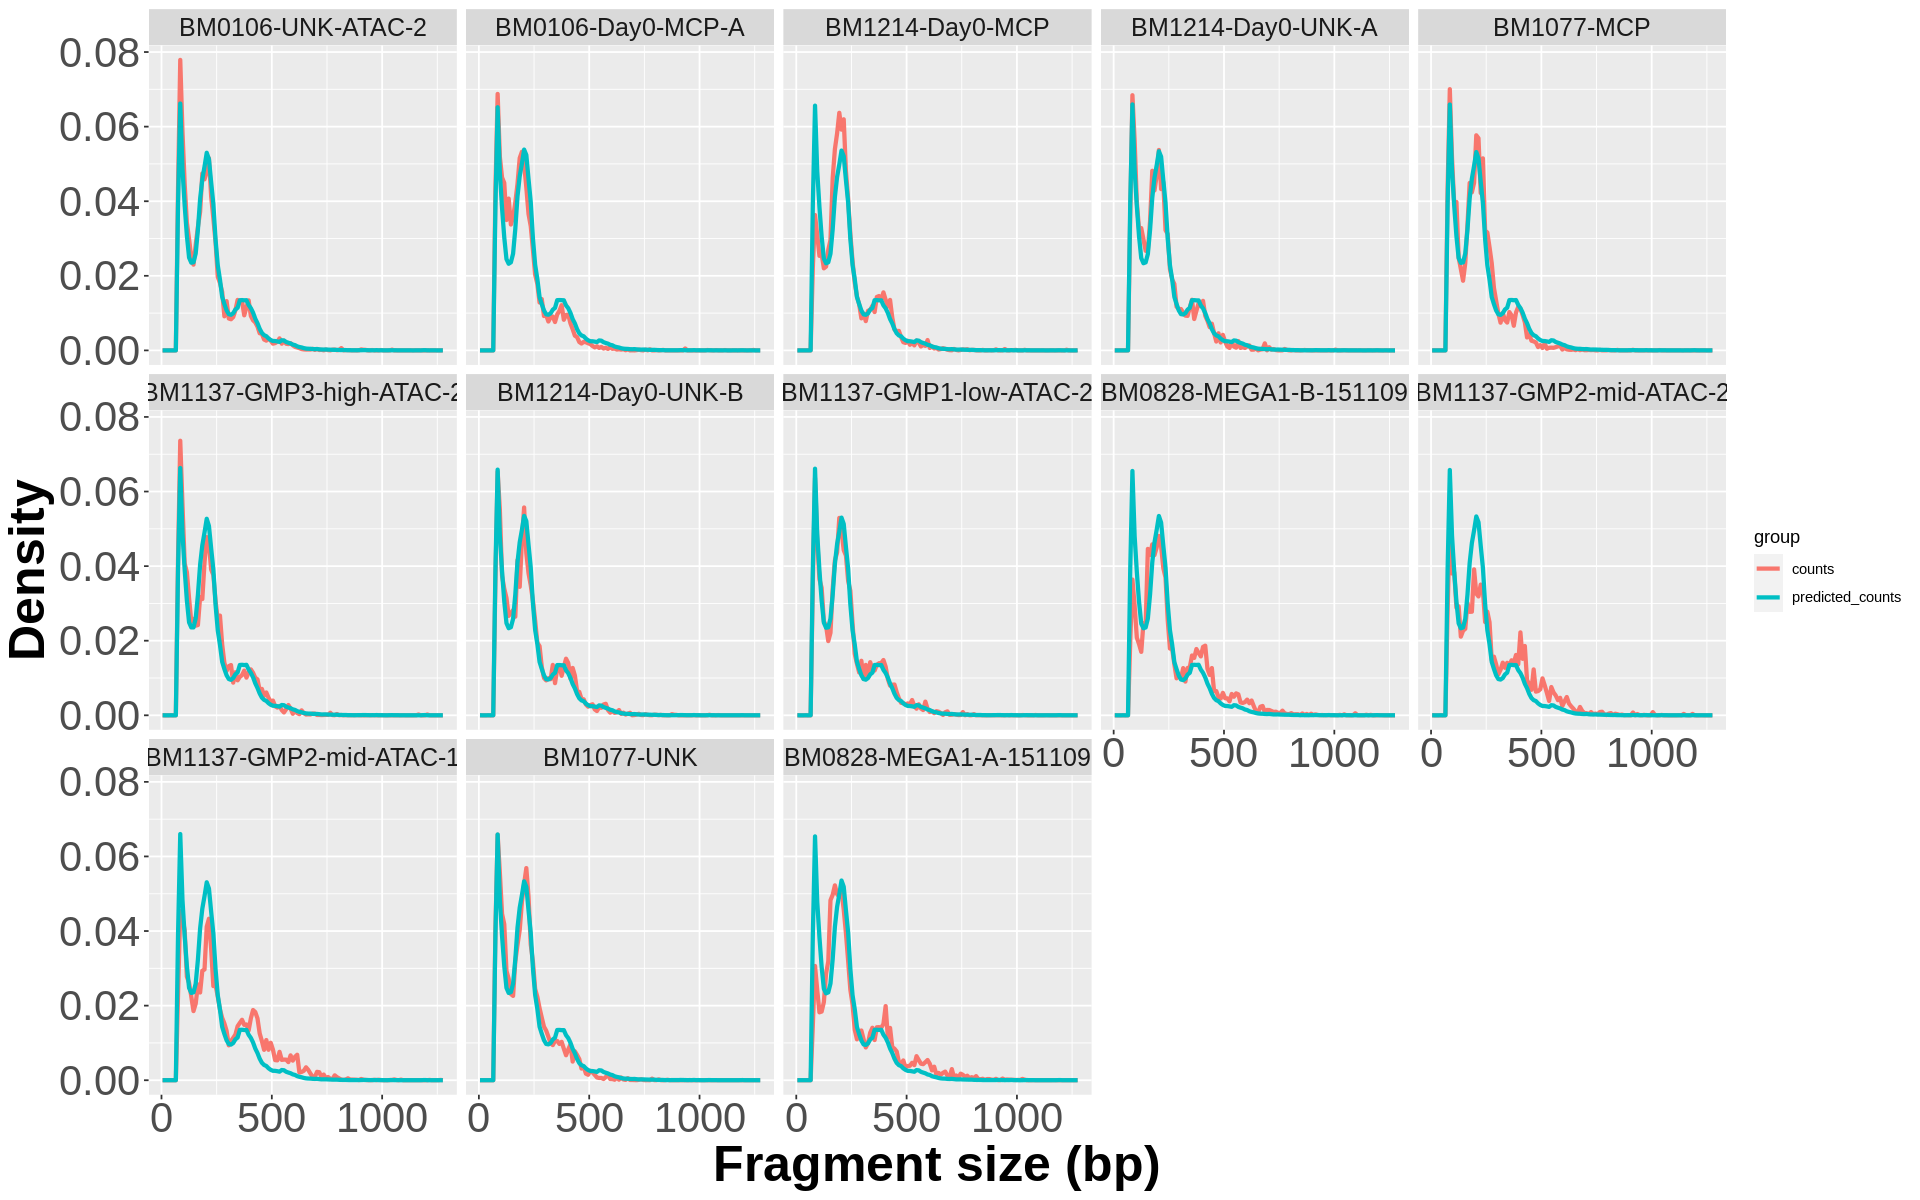

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 10)
df %>%
  group_by(sample, interval, group) %>%
  summarize(value = sum(value)) %>%
  ggplot(aes(x = interval, y = value, color = group)) +
    geom_line(size = 1.2) +
    facet_wrap(. ~ sample, ncol = 5) +
    theme(
      strip.text.x = element_text(size = 15),
      axis.text=element_text(size=25),
      axis.title=element_text(size=30,face="bold")
    ) + 
    xlab('Fragment size (bp)') +
    ylab('Density')

## sessionInfo

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Matrix_1.4-0                      patchwork_1.1.1                  
 [3] broom_0.7.12                      AUC_0.3.0                        
 [5] magick_2.7.3                      circlize_0.4.14                  
 [7] EnrichedHeatmap_1.24.0

In [ ]:
Sys.time() - start_time

Time difference of 7.524447 hours